In [1]:
import os

os.environ['KAGGLE_USERNAME'] = "deepasaw" # username from the json file
os.environ['KAGGLE_KEY'] = "5dff0638befced9033e3928a1d38d55b" # key from the json file

In [6]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-small

 95%|██████████████████████████████████████  | 537M/565M [00:06<00:00, 66.6MB/s]
100%|████████████████████████████████████████| 565M/565M [00:06<00:00, 87.6MB/s]


In [7]:
! unzip 'fashion-product-images-small.zip'

Archive:  fashion-product-images-small.zip
  inflating: images/10000.jpg        
  inflating: images/10001.jpg        
  inflating: images/10002.jpg        
  inflating: images/10003.jpg        
  inflating: images/10004.jpg        
  inflating: images/10005.jpg        
  inflating: images/10006.jpg        
  inflating: images/10007.jpg        
  inflating: images/10008.jpg        
  inflating: images/10009.jpg        
  inflating: images/10010.jpg        
  inflating: images/10011.jpg        
  inflating: images/10012.jpg        
  inflating: images/10013.jpg        
  inflating: images/10014.jpg        
  inflating: images/10015.jpg        
  inflating: images/10016.jpg        
  inflating: images/10017.jpg        
  inflating: images/10018.jpg        
  inflating: images/10019.jpg        
  inflating: images/10020.jpg        
  inflating: images/10021.jpg        
  inflating: images/10022.jpg        
  inflating: images/10023.jpg        
  inflating: images/10024.jpg        
  infla

In [8]:
DATASET_PATH = "myntradataset"
print(os.listdir(DATASET_PATH))

['images', 'styles.csv']


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
from multiprocessing import Pool
from keras_preprocessing.image import ImageDataGenerator

In [10]:
styles = pd.read_csv('styles.csv',error_bad_lines=False)
styles.head()

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

In [11]:
styles.shape

(44424, 10)

image name = 33397.jpg, image size = (80, 60, 3), image data type = uint8


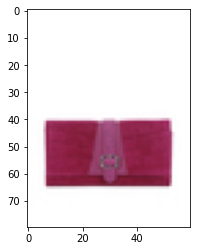

In [13]:
# get basic information of image
fname = random.choice([x for x in os.listdir('images')
               if os.path.isfile(os.path.join('images', x))])
image = mping.imread('images/' + fname)
plt.imshow(image)
print('image name = {}, image size = {}, image data type = {}'.format(fname, image.shape, image.dtype))

In [14]:
# mapping between images and styles.csv
from multiprocessing import Pool
   
p = Pool(5) # process 5 images simultaneously

image_name = []
for x in os.listdir('images'):
  if os.path.isfile:
    image_path = os.path.join('images', x)
    image_name.append(os.path.basename(image_path))

In [16]:
image_name

['10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10037.jpg',
 '10039.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '10071.jpg',
 '10072.jpg',
 '10073.jpg',
 '1007

In [17]:
image_number = [i.split('.')[0] for i in image_name]
image_number = [int(i) for i in image_number]
image_number = pd.DataFrame(image_number, columns = ['id'])
image_number.head(7)

id
0  10000
1  10001
2  10002
3  10003
4  10004
5  10005
6  10006

In [18]:
# inner join styles dataframe and image_number in images folder
styles_image = pd.merge(styles, image_number, how='inner', on = 'id')
print('Inner join styles and images dataframe size = {}'.format(styles_image.shape))

Inner joint styles and images dataframe size = (44419, 10)


In [19]:
# add in image name column for ImageDataGenerator
styles_image['image_name'] = styles_image.apply(lambda row: str(row['id']) + '.jpg', axis = 1)
styles_image.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName image_name  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016.0  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg

In [20]:
def data_generator(train_dataframe, sel_y_col):

    batch_size = 64
    image_width = image.shape[0]
    image_height = image.shape[1]
    image_generator = ImageDataGenerator(rescale=1./255)
                                        #  validation_split = 0.1
    training_generator = image_generator.flow_from_dataframe(
        dataframe = train_dataframe,
        directory = 'images',
        x_col = 'image_name', # image .jpg name
        y_col = sel_y_col, 
        target_size = (image_height,image_height), # original image size =(80,60,3) now make image_width and image_height the same!
        batch_size = batch_size, # default value
        shuffle = False,
        class_mode = 'categorical'
    )
    n_classes = len(training_generator.class_indices)
    print('total number of class', n_classes)

    return training_generator, n_classes

In [21]:
# articleType data generators
training_generator, n_classes = data_generator(styles_image, 'articleType')

Found 44419 validated image filenames belonging to 142 classes.
total number of class 142


In [22]:
training_generator.filenames[:10]

['15970.jpg',
 '39386.jpg',
 '59263.jpg',
 '21379.jpg',
 '53759.jpg',
 '1855.jpg',
 '30805.jpg',
 '26960.jpg',
 '29114.jpg',
 '30039.jpg']

In [23]:
styles_image.iloc[:10,10]

0    15970.jpg
1    39386.jpg
2    59263.jpg
3    21379.jpg
4    53759.jpg
5     1855.jpg
6    30805.jpg
7    26960.jpg
8    29114.jpg
9    30039.jpg
Name: image_name, dtype: object

In [24]:
batch_size = 64
training_samples = len(training_generator.filenames)
total_steps = training_samples // batch_size
print(training_samples, total_steps)

44419 694


In [25]:
import math
# getting the X features from generator
def features_matrix(generator, batch_size):
    number_of_examples = len(generator.filenames)
    number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
    features_matrix = []
    for i in range(0,int(number_of_generator_calls)):
        features_matrix.extend(np.array(generator[i][0]))
    return features_matrix

In [26]:
train_X =  features_matrix(training_generator, batch_size)
print('training X',len(train_X), train_X[0].shape)

training X 44419 (60, 60, 3)


In [28]:
train_X = np.array(train_X)
print(train_X.shape)

(44419, 60, 60, 3)


# Autoencoders

In [29]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

batch_size = 64
image_width = train_X.shape[1]
image_height = train_X.shape[2]
channels = train_X.shape[3]

input_img = Input(shape=(image_height, image_height, channels)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
conv_encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 8, 8) i.e. 512-dimensiona

x = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
conv_decoded = Conv2D(channels, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, conv_decoded) # set autoencoder
conv_encoder = Model(input_img, conv_encoded)  # set encoder

from keras import optimizers
adam = optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
#rmsprop = optimizers.RMSprop(lr=1e-3)

conv_autoencoder.compile(optimizer=adam, loss="binary_crossentropy") # not categorical_crossentropy !!!!


In [30]:
conv_autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60, 60, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 60, 60, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)          

In [31]:
import time
start = time.time()
conv_autoencoder_history = conv_autoencoder.fit(train_X, train_X,
                                                epochs=50,
                                                batch_size=128,
                                                shuffle=True,
                                                validation_split=0.2)
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

Epoch 1/50
278/278 [==============================] - 256s 919ms/step - loss: 0.6769 - val_loss: 0.6564
Epoch 2/50
278/278 [==============================] - 263s 945ms/step - loss: 0.6060 - val_loss: 0.5393
Epoch 3/50
278/278 [==============================] - 258s 930ms/step - loss: 0.4822 - val_loss: 0.4448
Epoch 4/50
278/278 [==============================] - 254s 913ms/step - loss: 0.4338 - val_loss: 0.4232
Epoch 5/50
278/278 [==============================] - 263s 946ms/step - loss: 0.4164 - val_loss: 0.4066
Epoch 6/50
278/278 [==============================] - 266s 956ms/step - loss: 0.3988 - val_loss: 0.3885
Epoch 7/50
278/278 [==============================] - 269s 969ms/step - loss: 0.3803 - val_loss: 0.3702
Epoch 8/50
278/278 [==============================] - 265s 953ms/step - loss: 0.3612 - val_loss: 0.3505
Epoch 9/50
278/278 [==============================] - 267s 959ms/step - loss: 0.3445 - val_loss: 0.3374
Epoch 10/50
278/278 [==============================] - 275s 991m

In [42]:
# plot train and valid loss history

def plot_loss(history):
    # plot train and valid loss history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epoch_number = range(len(loss))
    plt.plot(epoch_number, loss, 'r', label='train loss')
    plt.plot(epoch_number, val_loss, 'b', label='val loss')
    plt.title('Train and Validation Loss')
    plt.legend()

    plt.show()

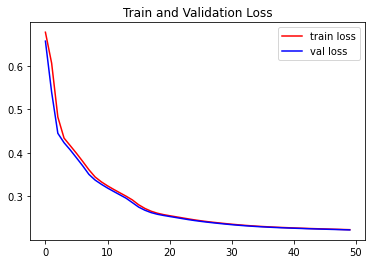

In [43]:
# plot train and valid loss history 
conv_autoencoder_loss_plot = plot_loss(conv_autoencoder_history)

In [ ]:
# save trained model
model_name = 'conv_autoencoder.h5'
conv_autoencoder.save(model_name)
#conv_autoencoder = keras.models.load_model('conv_autoencoder.h5')
#conv_autoencoder.summary()

In [44]:
# Generate embeddings using autoencoder model
encoded_imgs_train = conv_encoder.predict(train_X)
print(encoded_imgs_train.shape)

(44419, 8, 8, 8)


In [45]:
# flattern embedding features
output_shape_model = tuple([int(x) for x in encoded_imgs_train.shape[1:]])

encoded_imgs_train_flatten = encoded_imgs_train.reshape(-1, np.prod(output_shape_model))
print(encoded_imgs_train_flatten.shape)

(44419, 512)


In [46]:
# train dataset embedding feature dataframe
encoded_imgs_train_flatten_df = pd.DataFrame(encoded_imgs_train_flatten)
encoded_imgs_train_flatten_df['image_name'] = training_generator.filenames
cols = encoded_imgs_train_flatten_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
encoded_imgs_train_flatten_df = encoded_imgs_train_flatten_df[cols]
encoded_imgs_train_flatten_df.head()

image_name         0    1         2    3         4         5         6    7  \
0  15970.jpg  0.557168  0.0  0.419754  0.0  0.843576  2.268620  1.899880  0.0   
1  39386.jpg  0.609235  0.0  0.588636  0.0  0.526475  2.193727  1.826850  0.0   
2  59263.jpg  0.557168  0.0  0.419754  0.0  0.843576  2.268620  1.899880  0.0   
3  21379.jpg  0.555395  0.0  0.430432  0.0  0.823419  2.273568  1.892292  0.0   
4  53759.jpg  0.557168  0.0  0.419754  0.0  0.843576  2.268620  1.899880  0.0   

          8  ...       502  503  504       505       506  507       508  \
0  0.311825  ...  1.732634  0.0  0.0  0.305460  1.519564  0.0  0.940775   
1  0.376161  ...  1.771833  0.0  0.0  0.300409  1.525618  0.0  0.933375   
2  0.311831  ...  1.825196  0.0  0.0  0.300409  1.525618  0.0  0.933375   
3  0.362961  ...  1.819605  0.0  0.0  0.300409  1.525618  0.0  0.933375   
4  0.310436  ...  1.782959  0.0  0.0  0.300533  1.525035  0.0  0.934873   

        509       510  511  
0  1.356991  1.885189  0.0  
1  1.346888  1.891929  0.0  
2  1.346888  1.891929  0.0  
3  1.346888  1.891929  0.0  
4  1.347530  1.891392  0.0  

[5 rows x 513 columns]

In [47]:
from sklearn.metrics.pairwise import pairwise_distances

def image_search(input_img_indx, top_n):
    input_img = encoded_imgs_train_flatten_df.iloc[input_img_indx,1:] # column 0 is image_name
    input_img = np.array(input_img).reshape(1, -1)
    cosine_sim = 1 - pairwise_distances(input_img, encoded_imgs_train_flatten_df.iloc[:,1:], metric='cosine')
    output_img_idx = [i[0] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][1:top_n+1]
    output_img_scores = [i[1] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][1:top_n+1]
    print('total number of cosine similarity scores',cosine_sim.shape)
    return encoded_imgs_train_flatten_df.iloc[output_img_idx,0], output_img_scores, output_img_idx

In [48]:
input_img_indx = 4026
top_n = 5
output_images, search_scores, output_img_idx = image_search(input_img_indx, top_n)
print(output_images)
print(search_scores)
print(output_img_idx)

total number of cosine similarity scores (1, 44419)
28137    21236.jpg
10442    17751.jpg
13006    31643.jpg
36211     4425.jpg
24664    19323.jpg
Name: image_name, dtype: object
[0.9979583255101019, 0.9976815450309467, 0.9965822386162051, 0.9964335710369338, 0.9964330078690357]
[28137, 10442, 13006, 36211, 24664]


Target image and the top5 recommended images


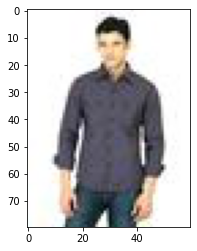

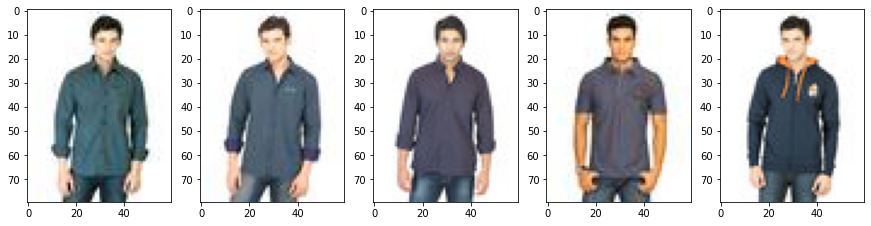

In [49]:
print('Target image and the top5 recommended images')
fname = encoded_imgs_train_flatten_df.iloc[input_img_indx,0]
input_image = mping.imread('images/' + fname)
plt.imshow(input_image)

fig = plt.figure(figsize=(15,14))
for i in range(top_n-4, top_n+1):
    image = mping.imread('images/' + output_images.iloc[i-1])
    fig.add_subplot(1, top_n, i)
    plt.imshow(image)
plt.show()

In [50]:
# list top5 and target image features
output_img_idx.append(input_img_indx)
styles_image.iloc[output_img_idx,:]

id gender masterCategory subCategory  articleType baseColour  \
28137  21236    Men        Apparel     Topwear       Shirts       Blue   
10442  17751    Men        Apparel     Topwear       Shirts  Navy Blue   
13006  31643    Men        Apparel     Topwear       Shirts     Purple   
36211   4425    Men        Apparel     Topwear      Tshirts  Navy Blue   
24664  19323    Men        Apparel     Topwear  Sweatshirts  Navy Blue   
4026   22360    Men        Apparel     Topwear       Shirts       Blue   

       season    year   usage  \
28137    Fall  2011.0  Casual   
10442    Fall  2011.0  Casual   
13006  Summer  2012.0  Casual   
36211  Summer  2011.0  Casual   
24664    Fall  2011.0  Casual   
4026     Fall  2011.0  Casual   

                                      productDisplayName image_name  
28137                    Highlander Men Blue Check Shirt  21236.jpg  
10442             Highlander Men Stripes Navy Blue Shirt  17751.jpg  
13006                     Indigo Nation Men Purple Shirt  31643.jpg  
36211  Wrangler Men's Reverse Polo Pique Navy Blue T-...   4425.jpg  
24664              Myntra Men Solid Navy Blue Sweatshirt  19323.jpg  
4026                   John Players Men Check Blue Shirt  22360.jpg

In [56]:
!pip install opencv-python

     |████████████████████████████████| 49.5 MB 44.0 MB/s eta 0:00:01    |█████████                       | 13.8 MB 7.3 MB/s eta 0:00:05


(1, 60, 60, 3)


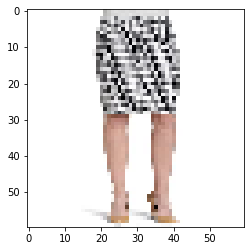

In [57]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# original image size
image_height = image.shape[1]
#path =''
my_image = "skirt.jpg" # blueshirt1.jpg, tshirt1.jpg, earing1.jpeg
#fname = path + my_image
my_image = mpimg.imread(my_image)
my_image = my_image * 1./255

resize_image = cv2.resize(my_image,(image_height, image_height))
plt.imshow(resize_image, interpolation='nearest')

resize_image = resize_image.reshape(1,resize_image.shape[0],resize_image.shape[1],resize_image.shape[2])
print(resize_image.shape)

In [58]:
# using trained autoencoder to generate encoding features
conv_encoded_image = conv_encoder.predict(resize_image)
print(conv_encoded_image.shape)

(1, 8, 8, 8)


In [59]:
def my_image_search(my_image, top_n):
    input_img = my_image
    input_img = np.array(input_img).reshape(1, -1)
    cosine_sim = 1 - pairwise_distances(input_img, encoded_imgs_train_flatten_df.iloc[:,1:], metric='cosine')
    output_img_idx = [i[0] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][:top_n]
    output_img_scores = [i[1] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][:top_n]
    print('total number of cosine similarity scores',cosine_sim.shape)
    return encoded_imgs_train_flatten_df.iloc[output_img_idx,0], output_img_scores

In [60]:
my_output_images, my_search_scores = my_image_search(conv_encoded_image, 5)
print(my_output_images)
print(my_search_scores)

total number of cosine similarity scores (1, 44419)
35505    47658.jpg
19058    26986.jpg
11238    52522.jpg
11496    39225.jpg
14992    54049.jpg
Name: image_name, dtype: object
[0.98609394, 0.98443913, 0.9843843, 0.98434854, 0.9841668]


Target image and the top5 recommended images


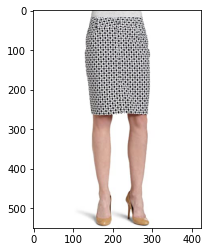

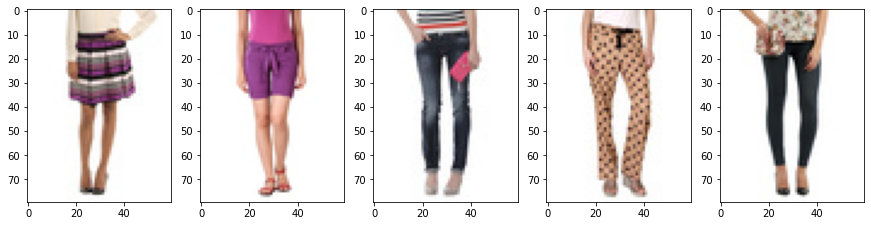

In [63]:
print('Target image and the top5 recommended images')
input_image = mping.imread('skirt.jpg')
plt.imshow(input_image)

fig = plt.figure(figsize=(15,14))
for i in range(top_n-4, top_n+1):
    fname = 'images/' + my_output_images.iloc[i-1]
    image = mping.imread(fname)
    #image = mping.imread('/images/' + my_output_images.iloc[i-1])
    fig.add_subplot(1, top_n, i)
    plt.imshow(image)
plt.show()